In [1]:
from pandas.core import groupby
import streamlit as st
import pandas as pd
import numpy as np
import seaborn as sns
import plotly
import plotly.express as px
import openpyxl
from scipy import stats
import numpy as np


pd.set_option('display.max_columns', None)

hg = sns.light_palette('green', as_cmap=True)



    

In [80]:
df = pd.read_excel('combineddata/FlipCombined.xlsx',  engine='openpyxl')
df = df.sort_values(by='Date', ascending=False)
df.head()




,Unnamed: 0,Week,Month,Date,Store Name,Store ID,City,Order Count,Gross Revenue,Net Revenue,Net Income,出杯数,Customer Count,Completed Orders,Average Spend,Cash Pay,Card Pay,WeChat Pay,WeChat Scan Pay,Mini-App Pay,Alipay,Member Pay,Net Member Pay,Member Bonus,Sherpas,Boss Consumed,Gift Voucher,Gift Voucher Net Revenue,Vocher Exchange,Voucher Exchange Net Revenue,Cash Voucher,Loss,领用,Eleme,Eleme Comission,Eleme Fees,Eleme Delivery Fee,Meituan,Meituan Comission,Mietuan Delivery Fee,Wiped to zero,Total Discount,Total Free,Hold Order,Returns,Fapiao,ReCharge,Delivery Comission,Delivery Fee,在线活动预售,在线活动核销,Online Revenue,In-Store Revenue
1944,1944,30,7,2021-07-29,QD 1,8,青岛,19,1682.0,1276.23,1276.23,0,NaN,19,67.17,72.0,0,67.0,67.0,0.0,122.0,0,0,0,0,0,0,0,0,0,0,0,0,608.16,115.84,0.0,NaN,407.07,102.93,NaN,0,187.0,0,0,0.0,0,0,218.77,0,0,0,1015.23,261.0
1943,1943,30,7,2021-07-29,7 Magnolia,6,上海,42,2982.5,2133.60,2133.60,0,NaN,42,50.80,0.0,0,0.0,0.0,0.0,0.0,0,0,0,99,0,0,0,0,0,0,0,0,1601.04,353.76,1.0,NaN,433.56,93.44,NaN,0,351.7,49,0,0.0,0,0,447.20,0,0,0,2133.60,0.0
1942,1942,30,7,2021-07-29,2 Fengxian,1,上海,80,5755.5,4430.99,4430.99,0,NaN,80,55.39,0.0,0,704.0,594.0,110.0,458.0,104,104,0,151,0,0,0,0,0,0,0,0,1653.65,388.35,1.5,NaN,1360.34,292.66,NaN,0,582.0,60,0,0.0,0,0,681.01,0,0,0,3274.99,1052.0
1941,1941,30,7,2021-07-29,4 Zunyi,3,上海,64,5066.5,3929.68,3929.68,0,NaN,64,61.40,49.0,0,675.0,570.0,105.0,298.0,0,0,0,320,0,0,0,0,0,0,0,0,1251.78,275.22,2.0,NaN,1335.90,280.60,NaN,0,579.0,0,0,0.0,0,0,555.82,0,0,0,3012.68,917.0
1940,1940,30,7,2021-07-29,3 Pudong,2,上海,109,9998.5,7368.22,7368.22,0,NaN,109,67.60,0.0,0,387.0,338.0,49.0,471.0,0,0,0,70,0,0,0,0,0,0,0,0,4011.83,881.07,2.0,NaN,2428.39,520.11,NaN,0,1142.1,85,0,0.0,0,0,1401.18,0,0,0,6559.22,809.0


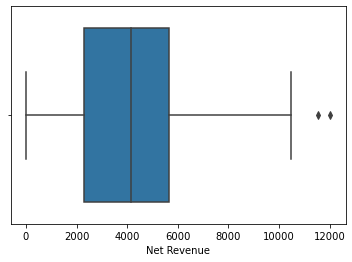

In [4]:
out = sns.boxplot(x=df['Net Revenue'], data = df)


In [78]:
def checkOut_total_revenue(store_name):
        df_curr = df[df['Store Name'] == store_name]
        z = np.abs(stats.zscore(df_curr['Net Revenue']))
        res = np.where(z > 3)
      
        for x in res:
          #    return df_curr.iloc[x,:]
             df_curr.drop(df_curr.iloc[x,:].index, inplace=True)
        
        z2 = np.abs(stats.zscore(df_curr['Net Revenue']))
        res2 = np.where(z2 > 2)

        for x in res2:
          outliers =  df_curr.iloc[x,:]
          return pd.DataFrame(outliers)

In [79]:
checkOut_total_revenue('10 CX')

/Users/simeonbourim/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Unnamed: 0,Week,Month,Date,Store Name,Store ID,City,Order Count,Gross Revenue,Net Revenue,Net Income,出杯数,Customer Count,Completed Orders,Average Spend,Cash Pay,Card Pay,WeChat Pay,WeChat Scan Pay,Mini-App Pay,Alipay,Member Pay,Net Member Pay,Member Bonus,Sherpas,Boss Consumed,Gift Voucher,Gift Voucher Net Revenue,Vocher Exchange,Voucher Exchange Net Revenue,Cash Voucher,Loss,领用,Eleme,Eleme Comission,Eleme Fees,Eleme Delivery Fee,Meituan,Meituan Comission,Mietuan Delivery Fee,Wiped to zero,Total Discount,Total Free,Hold Order,Returns,Fapiao,ReCharge,Delivery Comission,Delivery Fee,在线活动预售,在线活动核销,Online Revenue,In-Store Revenue
260,260,13,4,2021-04-04,10 CX,10,上海,9,620.00,391.40,391.40,0,5.0,9,43.49,0.0,0,188.0,188.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,123.31,29.89,0.0,0.0,80.09,16.41,0.0,0,43.30,139,0,0.0,0,0,46.30,0,0,0,203.40,188.0
270,270,13,4,2021-04-03,10 CX,10,上海,4,0.00,0.00,0.00,0,4.0,0,0.00,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0.00,0,0,49.0,0,0,0.00,0,0,0,0.00,0.0
280,280,13,4,2021-04-02,10 CX,10,上海,0,0.00,0.00,0.00,0,0.0,0,0.00,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0.00,0,0,0.0,0,0,0.00,0,0,0,0.00,0.0
290,290,13,4,2021-04-01,10 CX,10,上海,0,0.00,0.00,0.00,0,0.0,0,0.00,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0.00,0,0,0.0,0,0,0.00,0,0,0,0.00,0.0
300,300,13,3,2021-03-31,10 CX,10,上海,0,0.00,0.00,0.00,0,0.0,0,0.00,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0,0.00,0,0,0.0,0,0,0.00,0,0,0,0.00,0.0
1355,1355,19,5,2021-05-14,10 CX,10,上海,50,4082.50,2953.24,2953.24,0,6.0,50,59.06,59.0,0,0.0,0.0,0.0,189.0,0,0,0,97,0,0,0,0,0,0,0,0,1790.00,393.12,1.0,0.0,818.24,172.76,0.0,0,562.38,0,0,0.0,0,0,565.88,0,0,0,2705.24,248.0
1385,1385,19,5,2021-05-11,10 CX,10,上海,56,4523.71,3241.49,3241.49,0,9.0,55,58.94,0.0,0,146.0,146.0,0.0,258.0,0,0,0,63,0,0,0,0,0,0,0,0,2133.33,490.84,1.5,0.0,641.16,131.34,0.0,0,658.54,0,0,0.0,0,0,622.18,0,0,0,2837.49,404.0
1665,1665,30,7,2021-07-26,10 CX,10,上海,6,471.50,352.23,352.23,0,1.0,6,58.71,0.0,0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,166.33,36.51,0.0,NaN,185.90,39.10,NaN,0,43.66,0,0,0.0,0,0,75.61,0,0,0,352.23,0.0


In [114]:
dfjl = df[df['Store Name'] == '8 Julu']
dfjl = dfjl.groupby('Store Name')[['Net Revenue', 'In-Store Revenue', 'Online Revenue', 'Eleme','Meituan' ]].mean()
dfjl.style.format("{:,.0f}")

,Net Revenue,In-Store Revenue,Online Revenue,Eleme,Meituan
Store Name,,,,,
8 Julu,"6,189","2,571","3,617","2,007",804


In [104]:
def checkOut_total_revenue_last30(store_name):
        
        df_curr = df[df['Store Name'] == store_name]
        df_curr = df_curr.head(30)
        df_curr = df_curr[-30:]
        z = np.abs(stats.zscore(df_curr['Net Revenue']))
        res = np.where(z > 2)

        for x in res:
          outliers =  df_curr.iloc[x,:]
          return pd.DataFrame(outliers)

In [105]:
checkOut_total_revenue_last30('8 Julu')

,Unnamed: 0,Week,Month,Date,Store Name,Store ID,City,Order Count,Gross Revenue,Net Revenue,Net Income,出杯数,Customer Count,Completed Orders,Average Spend,Cash Pay,Card Pay,WeChat Pay,WeChat Scan Pay,Mini-App Pay,Alipay,Member Pay,Net Member Pay,Member Bonus,Sherpas,Boss Consumed,Gift Voucher,Gift Voucher Net Revenue,Vocher Exchange,Voucher Exchange Net Revenue,Cash Voucher,Loss,领用,Eleme,Eleme Comission,Eleme Fees,Eleme Delivery Fee,Meituan,Meituan Comission,Mietuan Delivery Fee,Wiped to zero,Total Discount,Total Free,Hold Order,Returns,Fapiao,ReCharge,Delivery Comission,Delivery Fee,在线活动预售,在线活动核销,Online Revenue,In-Store Revenue
1677,1677,29,7,2021-07-25,8 Julu,7,上海,23,2145.0,1761.14,1761.14,0,9.0,23,76.57,0.0,0,25.0,25.0,0.0,178.0,0,0,0,620,0,0,0,0,0,0,0,0,818.2,179.6,0.0,NaN,119.94,26.06,NaN,0,178.2,0,0,0.0,0,0,205.66,0,0,0,1558.14,203.0


In [102]:
def checkOut_total_revenue_last7(store_name):
        
        df_curr = df[df['Store Name'] == store_name]
        df_curr = df_curr.head(7)
        df_curr = df_curr[-30:]
        z = np.abs(stats.zscore(df_curr['Net Revenue']))
        res = np.where(z > 1)

        for x in res:
          outliers =  df_curr.iloc[x,:]
          return pd.DataFrame(outliers)

In [118]:
checkOut_total_revenue_last7('8 Julu').style.format({"Net Revenue": "${:20,.0f}"})

,Unnamed: 0,Week,Month,Date,Store Name,Store ID,City,Order Count,Gross Revenue,Net Revenue,Net Income,出杯数,Customer Count,Completed Orders,Average Spend,Cash Pay,Card Pay,WeChat Pay,WeChat Scan Pay,Mini-App Pay,Alipay,Member Pay,Net Member Pay,Member Bonus,Sherpas,Boss Consumed,Gift Voucher,Gift Voucher Net Revenue,Vocher Exchange,Voucher Exchange Net Revenue,Cash Voucher,Loss,领用,Eleme,Eleme Comission,Eleme Fees,Eleme Delivery Fee,Meituan,Meituan Comission,Mietuan Delivery Fee,Wiped to zero,Total Discount,Total Free,Hold Order,Returns,Fapiao,ReCharge,Delivery Comission,Delivery Fee,在线活动预售,在线活动核销,Online Revenue,In-Store Revenue
1937,1937,30,7,2021-07-29 00:00:00,8 Julu,7,上海,119,9513.500000,"$ 7,664",7664.010000,0,nan,119,64.400000,131.000000,0,1810.000000,1179.000000,631.000000,1361.000000,0,0,0,412,0,0,0,0,0,0,0,0,2677.960000,588.840000,1.000000,nan,1272.050000,262.450000,nan,0,997.200000,0,0,0.000000,0,0,851.290000,0,0,0,4993.010000,2671.000000
1677,1677,29,7,2021-07-25 00:00:00,8 Julu,7,上海,23,2145.000000,"$ 1,761",1761.140000,0,9.000000,23,76.570000,0.000000,0,25.000000,25.000000,0.000000,178.000000,0,0,0,620,0,0,0,0,0,0,0,0,818.200000,179.600000,0.000000,nan,119.940000,26.060000,nan,0,178.200000,0,0,0.000000,0,0,205.660000,0,0,0,1558.140000,203.000000


In [119]:
def checkOut_last7_all(plat):

        df.head(7)
        z = np.abs(stats.zscore(df[plat]))
        res = np.where(z > 1.5)

        for x in res:
          outliers =  df.iloc[x,:]
          return pd.DataFrame(outliers)

In [ ]:
checkOut_last7_all('Eleme')

In [13]:
df['Store Name'].unique('10 CX')

array(['10 CX', '9 CS', '8 Julu', '5 TS', '6 Gubei', '3 Pudong',
       '4 Zunyi', '2 Fengxian', '7 Magnolia', 'QD 1'], dtype=object)